In [1]:
from google.colab import drive
drive.mount('/content/drive')#코랩 mount

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import os
import h5py
import image
import operator

import tensorflow as tf
import matplotlib.pyplot as plt
import time, pickle, pandas

import numpy as np

import keras
from PIL import Image
import glob

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D ,Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras import backend
from keras import optimizers
from keras import applications
#라이브러리 설치

print(keras.__version__) # keras, tensorflow version 확인
print(tf.__version__)
%matplotlib inline

2.4.3
2.3.0


Fabric generator

In [ ]:
train_data_dir = 'drive/My Drive/데청캠 프로젝트/image_data/fabric/fabric_train'
validation_data_dir = 'drive/My Drive/데청캠 프로젝트/image_data/fabric/fabric_val'
test_data_dir = 'drive/My Drive/데청캠 프로젝트/image_data/fabric/fabric_test'
# 이미지 경로 생성
# class indicator 사용하기 위한 경로 설정

img_width, img_height = 150, 150
#가져 올 image 크기 설정

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

#image generator을 사용해 datagen 생성 + agument 사용으로 overfitting을 낮추고 detection accuracy 높이기 위해 사용
#train과 test datagen 생성

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=20,
        class_mode='categorical')

# flow from directory를 사용해 train, validation, test 이미지 가져오기

Found 2804 images belonging to 4 classes.
Found 622 images belonging to 4 classes.
Found 320 images belonging to 4 classes.


Color generator

In [ ]:
train_color_dir = 'drive/My Drive/데청캠 프로젝트/image_data/color/train'
validation_color_dir = 'drive/My Drive/데청캠 프로젝트/image_data/color/val'
test_color_dir = 'drive/My Drive/데청캠 프로젝트/image_data/color/test'
# 이미지 경로 생성
# class indicator 사용하기 위한 경로 설정

img_width, img_height = 150, 150
#가져 올 image 크기 설정

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

#image generator을 사용해 datagen 생성 + agument 사용으로 overfitting을 낮추고 detection accuracy 높이기 위해 사용
#train과 test datagen 생성

In [ ]:
train_color_generator = train_datagen.flow_from_directory(
        train_color_dir,
        target_size=(img_width, img_height),
        batch_size=20,
        class_mode='categorical')

validation_color_generator = test_datagen.flow_from_directory(
        validation_color_dir,
        target_size=(img_width, img_height),
        batch_size=20,
        class_mode='categorical')

test_color_generator = test_datagen.flow_from_directory(
        test_color_dir,
        target_size=(img_width, img_height),
        batch_size=20,
        class_mode='categorical')

# flow from directory를 사용해 train, validation, test 이미지 가져오기

Found 1165 images belonging to 3 classes.
Found 450 images belonging to 3 classes.
Found 285 images belonging to 3 classes.


Length generator

In [ ]:
train_sleeve_dir = 'drive/My Drive/데청캠 프로젝트/image_data/sleeve/sleeve_train'
validation_sleeve_dir = 'drive/My Drive/데청캠 프로젝트/image_data/sleeve/sleeve_val'
test_sleeve_dir = 'drive/My Drive/데청캠 프로젝트/image_data/sleeve/sleeve_test'

# 이미지 경로 생성
# class indicator 사용하기 위한 경로 설정

img_width, img_height = 150, 150

#가져 올 image 크기 설정

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

#image generator을 사용해 datagen 생성 + agument 사용으로 overfitting을 낮추고 detection accuracy 높이기 위해 사용
#train과 test datagen 생성

In [ ]:
train_length_generator = train_datagen.flow_from_directory(
        train_sleeve_dir,
        target_size=(img_width, img_height),
        batch_size=20,
        class_mode='categorical')

validation_length_generator = test_datagen.flow_from_directory(
        validation_sleeve_dir,
        target_size=(img_width, img_height),
        batch_size=20,
        class_mode='categorical')

test_length_generator = test_datagen.flow_from_directory(
        test_sleeve_dir,
        target_size=(img_width, img_height),
        batch_size=20,
        class_mode='categorical')

# flow from directory를 사용해 train, validation, test 이미지 가져오기

Found 328 images belonging to 2 classes.
Found 72 images belonging to 2 classes.
Found 115 images belonging to 2 classes.


저장된 Model 가져오기

In [ ]:
!ls 'drive/My Drive/데청캠 프로젝트/models'

color10.h5	   vgg_weights_best_pattern_2.hdf5
fabric.h5	   vgg_weights_frozen_fabric_new_1.hdf5
inception_v3.ckpt  vgg_weights_frozen_pattern_1.hdf5
length.h5	   vgg_weights_frozen_pattern_2.hdf5


In [ ]:
best_fabric_path = 'drive/My Drive/데청캠 프로젝트/models/fabric.h5' #model1 path 경로 설정

In [ ]:
model1=load_model(best_fabric_path) #model1 가져오기

In [ ]:
best_color_path = 'drive/My Drive/데청캠 프로젝트/models/color10.h5' #model2 path 경로 설정

In [ ]:
model2=load_model(best_color_path) #model2 가져오기

In [ ]:
best_length_path = 'drive/My Drive/데청캠 프로젝트/models/length.h5'#model3 path 경로 설정

In [ ]:
model3=load_model(best_length_path) #model3 가져오기

시각화 & label 예측

In [ ]:
import numpy as np
from google.colab import files
from io import BytesIO
from PIL import Image

In [ ]:
! pip install lime 

     |████████████████████████████████| 276kB 2.7MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283845 sha256=8239caa256988de3a4c8ac9326091ee16d537bb6350c2540e134d2dc564b9dc1
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [ ]:
import pandas as pd 

from keras.models import load_model
from keras.preprocessing import image

from sklearn.preprocessing import LabelEncoder
import glob

import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import random

In [ ]:
uploaded=files.upload() # file uploads
img = Image.open(BytesIO(uploaded['니트.jpg'])).resize((150, 150)) #uploads to open & resize image
img_arr = np.asarray(img)[:, :, :3] / 255 #normalization
img_array = np.expand_dims(img_arr, 0)

Saving 니트.jpg to 니트.jpg


사진 재질 예측

In [ ]:
explainer = lime_image.LimeImageExplainer(random_state=42)

X=img_array
explanation = explainer.explain_instance(X[0], model1, hide_color=0, top_labels=5, num_samples=1000) #bring our model1 and use to detect our image

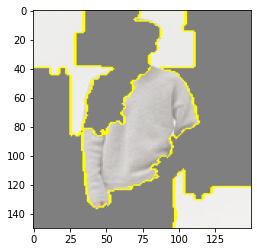

In [ ]:
from skimage.segmentation import mark_boundaries

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask)) # show how to detect our image

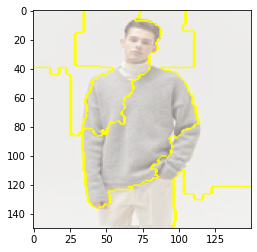

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask)) # show raw image and how to detect our image

In [ ]:
fabric_label = (train_generator.class_indices) #detect our label of category
print(fabric_label)

{'cotton': 0, 'denim': 1, 'knit': 2, 'leather': 3}


In [ ]:
explanation.top_labels[0] # We can know what the fabric is.

2

In [ ]:
fabric_label={v:k for k,v in fabric_label.items()} #Change order of key, value

In [ ]:
fabric_label #check

{0: 'cotton', 1: 'denim', 2: 'knit', 3: 'leather'}

In [ ]:
fabric_label.get(explanation.top_labels[0]) #know the fabric of word.

'knit'

사진 색 예측

In [ ]:
explainer = lime_image.LimeImageExplainer(random_state=42)

X=img_array
explanation = explainer.explain_instance(X[0], model2, hide_color=0, top_labels=5, num_samples=1000)  #bring our model2 and use to detect our image

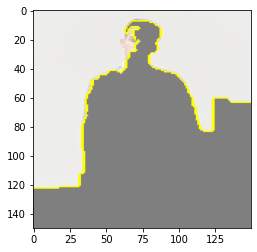

In [ ]:
from skimage.segmentation import mark_boundaries

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask)) # show how to detect our image

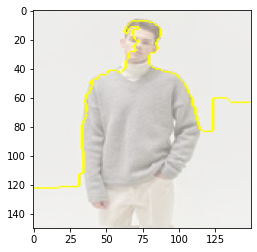

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask)) # show raw image and how to detect our image

In [ ]:
color_label = (train_color_generator.class_indices) #detect our label of category
print(color_label)

{'bright': 0, 'dark': 1, 'etc': 2}


In [ ]:
color_label={v:k for k,v in color_label.items()} #Change order of key, value

In [ ]:
explanation.top_labels[0] #detect our label of category

1

In [ ]:
color_label

{0: 'bright', 1: 'dark', 2: 'etc'}

In [ ]:
color_label.get(explanation.top_labels[0]) #know the fabric of word.

'dark'

사진 옷 소매 길이 예측

In [ ]:
explainer = lime_image.LimeImageExplainer(random_state=42)

X=img_array
explanation = explainer.explain_instance(X[0], model3, hide_color=0, top_labels=5, num_samples=1000) #bring our model3 and use to detect our image

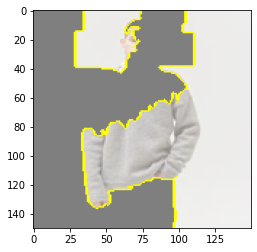

In [ ]:
from skimage.segmentation import mark_boundaries

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask)) # show how to detect our image

In [ ]:
length_label = (train_length_generator.class_indices) #detect our label of category
print(length_label)

{'half sleeve_train': 0, 'long sleeve_train': 1}


In [ ]:
length_label = {v:k for k,v in length_label.items()} #Change order of key, value

In [ ]:
length_label

{0: 'half sleeve_train', 1: 'long sleeve_train'}

In [ ]:
length_label.get(explanation.top_labels[0]) #know the fabric of word.

'long sleeve_train'

In [ ]:
cloth_info.append(length_label.get(explanation.top_labels[0])) #integrete our all detection data

In [ ]:
print(cloth_info) #result

['knit', 'dark', 'long sleeve_train']
